In [1]:
import restapi

/Users/colinwong/.pyenv/versions/3.10.13/lib/python3.10/site-packages/restapi/common_types.py:42: UserWarning: No Arcpy found, some limitations in functionality may apply.
  warnings.warn('No Arcpy found, some limitations in functionality may apply.')


In [2]:
SERVER_URL = (
    "https://geospatial.nctcog.org/server/rest/services"
    # + "/Transportation/TrafficCounts/MapServer"
)
ags = restapi.ArcServer(SERVER_URL)

/Users/colinwong/.pyenv/versions/3.10.13/lib/python3.10/site-packages/restapi/rest_utils.py:42: UserWarning: no request client has been set, using default client
  warnings.warn('no request client has been set, using default client')


In [3]:
traffic_counts_service = ags.getService("TrafficCounts")

/Users/colinwong/.pyenv/versions/3.10.13/lib/python3.10/site-packages/restapi/common_types.py:1355: UserWarning: Authentation Error for folder Economy: 
{'error': {'code': 499, 'message': 'Token Required', 'details': []}}
  warnings.warn('Authentation Error for folder {}: {}{}'.format(s, os.linesep,  e))
/Users/colinwong/.pyenv/versions/3.10.13/lib/python3.10/site-packages/restapi/common_types.py:1355: UserWarning: Authentation Error for folder Planimetric: 
{'error': {'code': 499, 'message': 'Token Required', 'details': []}}
  warnings.warn('Authentation Error for folder {}: {}{}'.format(s, os.linesep,  e))
/Users/colinwong/.pyenv/versions/3.10.13/lib/python3.10/site-packages/restapi/common_types.py:1355: UserWarning: Authentation Error for folder Raster: 
{'error': {'code': 499, 'message': 'Token Required', 'details': []}}
  warnings.warn('Authentation Error for folder {}: {}{}'.format(s, os.linesep,  e))
/Users/colinwong/.pyenv/versions/3.10.13/lib/python3.10/site-packages/restapi/c

In [4]:
traffic_counts = traffic_counts_service.layer(0)
query = traffic_counts.query(where="Date>=Date'2021-01-01'", exceed_limit=True)

In [20]:
import geopandas as gpd
traffic_gdf = gpd.GeoDataFrame.from_features(query.json["features"])
traffic_gdf.set_crs(Projections.WGS84, inplace=True)
# from folium import plugins
# traffic_counts_x_routes = gpd.sjoin(
#     traffic_gdf,)

,geometry,OBJECTID,ID,Date,Roadway,From_Roadway,To_Roadway,Dir,StringDate,Records,...,Classification,MaxClassification,ByTimeOfDay,Turning,FirstDayTOD,Years,Permanent,ICON,LABEL,PairedID
0,POINT (-97.2228 32.6679),5,103884,1631059200000,I20,None,None,E,09/08/21,96,...,1,1,1,0,1,1,0,Classified,"110,427 (2021) E",103885
1,POINT (-97.33 32.7446),17,103901,1631232000000,I30,None,None,E,09/10/21,96,...,1,1,1,0,1,1,0,Classified,"105,870 (2021) E",103901
2,POINT (-97.3204 32.7332),29,51587,1713225600000,I 35W,None,None,N,04/16/24,24,...,1,1,1,0,1,10,0,Classified Historical,"96,053 (2024) N",51588
3,POINT (-96.8136 32.642),40,701,1729036800000,IH 20,None,None,E,10/16/24,24,...,1,1,1,0,1,26,0,Classified Historical,"94,502 (2024) E",702
4,POINT (-96.7358 32.9117),42,910,1728864000000,IH 635,None,None,W,10/14/24,24,...,1,1,1,0,1,21,0,Classified Historical,"90,124 (2024) W",910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23497,POINT (-97.0395 32.9337),60206,5233,1656460800000,STATE HWY 97,None,None,N,06/29/22,96,...,0,0,1,0,1,19,0,Historical,"34,245 (2022) N",5233
23498,POINT (-96.9192 32.7255),60207,107477,1728950400000,SPUR 408,None,None,S,10/15/24,96,...,0,0,1,0,1,2,0,Historical,"34,220 (2024) S",0
23499,POINT (-96.9659 33.1628),60209,64337,1729728000000,W Eldorado Pkwy,None,None,Both,10/24/24,24,...,1,1,1,0,1,7,0,Classified Historical,"34,142 (2024)",0
23500,POINT (-97.3324 32.8991),60213,103939,1631491200000,US287,None,None,S,09/13/21,96,...,1,1,1,0,1,1,0,Classified,"33,975 (2021) S",103940


In [42]:
traffic_gdf.columns, traffic_gdf.loc[10]

(Index(['geometry', 'OBJECTID', 'ID', 'Date', 'Roadway', 'From_Roadway',
        'To_Roadway', 'Dir', 'StringDate', 'Records', 'Count24hr', 'Longitude',
        'Latitude', 'City', 'County', 'Source', 'TypeOfCount', 'StrTotal',
        'Priority', 'Days', 'MaxRecords', 'totc', 'Classification',
        'MaxClassification', 'ByTimeOfDay', 'Turning', 'FirstDayTOD', 'Years',
        'Permanent', 'ICON', 'LABEL', 'PairedID'],
       dtype='object'),
 geometry             POINT (-96.99059999999997 32.83710000000008)
 OBJECTID                                                      123
 ID                                                         103864
 Date                                                1632096000000
 Roadway                                                     SH183
 From_Roadway                                                 None
 To_Roadway                                                   None
 Dir                                                    W         
 StringDate   

In [9]:
from pathlib import Path
from gtfslib import GTFS
data_folder = Path("data")
if not data_folder.exists():
    data_folder.mkdir()
export_folder = Path("export")
if not export_folder.exists():
    export_folder.mkdir()
file = Path(data_folder) / "dart_gtfs.zip"

gtfs = GTFS(file)
routes = gtfs.routes

from tableauscraper import TableauScraper as TS
import numpy as np
import pandas as pd
import colorsys

url = "https://tableau.dart.org/t/Public/views/DARTscorecard/DARTScorecard"
sheetName = "Ridership label KPI"
subsheetName = "by Route for DART Bus Service"

min_color = np.array((0, 1.0, 1.0))
max_color = np.array((0.333, 1.0, 0.8))


def scale_color(scaled_num):
    color_hsv = (max_color - min_color) * scaled_num + min_color
    color_rgb = [round(i * 255) for i in colorsys.hsv_to_rgb(*color_hsv)]
    color_hex = f"#{color_rgb[0]:02x}{color_rgb[1]:02x}{color_rgb[2]:02x}"
    return color_hex


data_folder.mkdir(parents=True, exist_ok=True)
export_folder.mkdir(parents=True, exist_ok=True)

print("Loading tableau...")
ts = TS()
ts.loads(url)

workbook = ts.getWorkbook()
ridershipSheet = ts.getWorksheet(sheetName)
dashboard = ridershipSheet.select("Ridership label", "Ridership Performance")

serviceByRoute = dashboard.getWorksheet(subsheetName)
data: pd.DataFrame = serviceByRoute.data
data.to_csv(export_folder / "tableau.csv")

columns = [
    "Route-value",
    "MEASURE_CODE-value",
    "SERVICE_CATEGORY-value",
    "SUM(MEASURE_VALUE)-value",
]

data["SUM(MEASURE_VALUE)-value"] //= 30  # monthly to daily average

filtered = data[data["SUM(MEASURE_VALUE)-value"] > 0].filter(columns, axis="columns")

Loading tableau...


In [23]:
import re
from operator import itemgetter
def get_route_name(name):
    m = re.search(r"\((.*)\)", name)
    if m:
        return m.group(1)
    if name == "TI":
        return "TI SHUTTLE"
    if name == "UTS":
        return "UT SOUTHWESTERN"

    print("unable to find route with name", name)
    return name


map_routes = []
for index, row in filtered.iterrows():
    route_name = get_route_name(row["Route-value"])
    matching_routes = routes[routes["route_long_name"] == route_name]
    if len(matching_routes) == 0:
        matching_routes = routes[routes["route_long_name"].str.contains(route_name)]
    matching_route_ids = matching_routes["route_id"]
    riders = int(row["SUM(MEASURE_VALUE)-value"])
    for rid in matching_route_ids:
        map_routes.append(
            (
                rid,
                riders,
                {
                    "daily_ridership": riders,
                    "route_desc": None,
                    "route_type": None,
                    "route_text_color": None,
                    "route_url": None,
                },
            )
        )


map_routes.sort(key=itemgetter(1))
route_info = {route[0]: route[2] for route in map_routes}

filtered_route_gdf = gtfs._routes_by_id[
    gtfs._routes_by_id.index.isin(list(map(itemgetter(0), map_routes)))
]

In [21]:
from gtfslib import CoordsUtil, Projections
traffic_counts_x_routes = gpd.sjoin(
    traffic_gdf,
    CoordsUtil.buffer_points(10, filtered_route_gdf).to_crs(Projections.WGS84),
)

In [50]:
from collections import defaultdict
route_efficiencies = defaultdict(list)
import folium
from folium import plugins

map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

heat_data = []

for idx, row in traffic_counts_x_routes.iterrows():
    count = row["Count24hr"]
    road = row["Roadway"] or "Unnamed Road"
    label = row["LABEL"] or ""
    if pd.isna(count):
        continue
    paired_route_id = row["route_id"]
    short_name = gtfs._routes_by_id.loc[paired_route_id]["route_short_name"]
    daily_riders = route_info[paired_route_id]["daily_ridership"]
    bus_efficiency = daily_riders / count if count > 0 else 0
    if bus_efficiency > 1 or count < 1000:
        continue
    heat_data.append([row.geometry.y, row.geometry.x, bus_efficiency])
    route_efficiencies[paired_route_id].append(bus_efficiency)

plugins.HeatMap(heat_data).add_to(map)
map

In [51]:
route_efficiency_summary = {}
for route_id, efficiencies in route_efficiencies.items():
    avg_efficiency = sum(efficiencies) / len(efficiencies)
    route_efficiency_summary[route_id] = avg_efficiency

In [52]:
max(route_efficiency_summary.items(), key=itemgetter(1))

('26681', 0.4330923220124229)

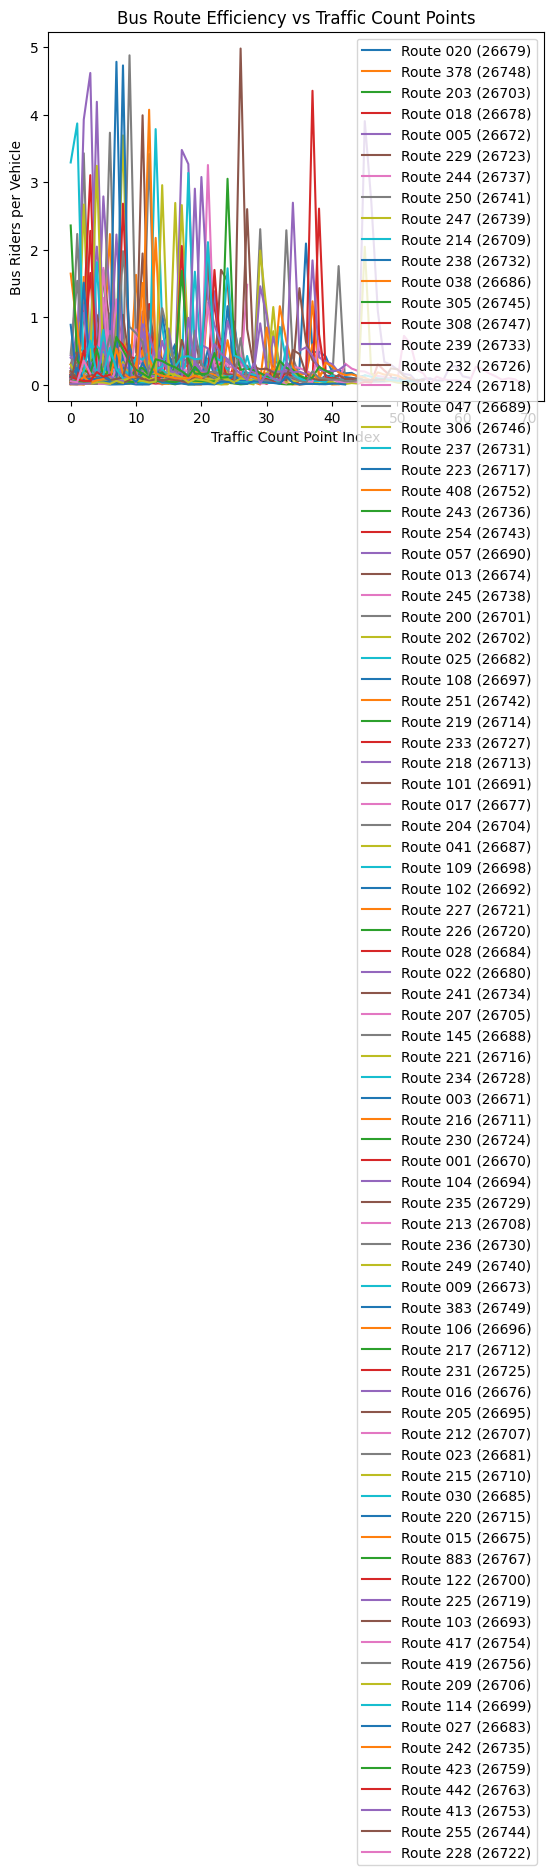

In [36]:
%matplotlib inline

# plot efficiencies
import matplotlib.pyplot as plt
for route_id, efficiencies in route_efficiencies.items():
    short_name = gtfs._routes_by_id.loc[route_id]["route_short_name"]
    plt.plot(efficiencies, label=f"Route {short_name} ({route_id})")
plt.xlabel("Traffic Count Point Index")
plt.ylabel("Bus Riders per Vehicle")
plt.title("Bus Route Efficiency vs Traffic Count Points")
plt.legend()
plt.show()

In [39]:
print(traffic_counts_x_routes.columns)
traffic_counts_x_routes.head()

Index(['geometry', 'OBJECTID', 'ID', 'Date', 'Roadway', 'From_Roadway',
       'To_Roadway', 'Dir', 'StringDate', 'Records', 'Count24hr', 'Longitude',
       'Latitude', 'City', 'County', 'Source', 'TypeOfCount', 'StrTotal',
       'Priority', 'Days', 'MaxRecords', 'totc', 'Classification',
       'MaxClassification', 'ByTimeOfDay', 'Turning', 'FirstDayTOD', 'Years',
       'Permanent', 'ICON', 'LABEL', 'PairedID', 'route_id'],
      dtype='object')


,geometry,OBJECTID,ID,Date,Roadway,From_Roadway,To_Roadway,Dir,StringDate,Records,...,MaxClassification,ByTimeOfDay,Turning,FirstDayTOD,Years,Permanent,ICON,LABEL,PairedID,route_id
53,POINT (-96.803 32.8655),673,15809,1730678400000,STATE HWY 12,None,None,E,11/04/24,96,...,0,1,0,1,26,0,Historical,"23,611 (2024) E",15810,26679
57,POINT (-96.8255 32.6419),682,107482,1729036800000,R L THORNTON,None,None,E,10/16/24,96,...,0,1,0,1,2,0,Historical,"23,406 (2024) E",0,26748
73,POINT (-96.631 32.8939),767,60412,1728259200000,BELT LINE,None,None,S,10/07/24,96,...,0,1,0,1,11,0,Historical,"21,567 (2024) S",60412,26703
75,POINT (-96.6861 32.8069),782,17767,1719187200000,JOHN WEST,None,None,E,06/24/24,96,...,0,1,0,1,26,0,Historical,"21,161 (2024) E",17768,26678
80,POINT (-96.8432 32.8371),821,22676,1730246400000,CEDAR SPRINGS,None,None,S,10/30/24,96,...,1,1,0,1,18,0,Historical,"20,642 (2024) S",22676,26672


In [56]:
pd.set_option('display.max_columns', None)

traffic_counts_x_routes[traffic_counts_x_routes["Roadway"].isin(["NORTHWEST HWY", "12"])]

,geometry,OBJECTID,ID,Date,Roadway,From_Roadway,To_Roadway,Dir,StringDate,Records,Count24hr,Longitude,Latitude,City,County,Source,TypeOfCount,StrTotal,Priority,Days,MaxRecords,totc,Classification,MaxClassification,ByTimeOfDay,Turning,FirstDayTOD,Years,Permanent,ICON,LABEL,PairedID,route_id
135,POINT (-96.73 32.7098),1171,61806,1728432000000,12,None,None,W,10/09/24,96,15889,-96.7300,32.7098,Dallas,Dallas,Tx DOT,Saturation Count (15-min),"15,889",7861,2,96,10,0,0,1,0,1,11,0,Historical,"15,889 (2024) W",61806,26686
3882,POINT (-96.6829 32.7398),16588,61792,1728259200000,12,None,None,S,10/07/24,96,2628,-96.6829,32.7398,Dallas,Dallas,Tx DOT,Saturation Count (15-min),"2,628",35867,3,96,10,0,0,1,0,1,11,0,Historical,"2,628 (2024) S",61792,26675
5740,POINT (-96.683 32.7577),20349,61709,1628553600000,12,None,None,S,08/10/21,96,19717,-96.6830,32.7577,Dallas,Dallas,Tx DOT,Saturation Count (15-min),"19,717",5236,4,96,10,0,0,1,0,1,8,0,Historical,"19,717 (2021) S",61709,26675
8737,POINT (-96.8284 32.8645),26967,60755,1730678400000,12,None,None,W,11/04/24,96,17993,-96.8284,32.8645,Dallas,Dallas,Tx DOT,Saturation Count (15-min),"17,993",6222,3,96,10,0,0,1,0,1,11,0,Historical,"17,993 (2024) W",60755,26679
8805,POINT (-96.856 32.8609),27151,60715,1730678400000,12,None,None,W,11/04/24,96,22619,-96.8560,32.8609,Dallas,Dallas,Tx DOT,Saturation Count (15-min),"22,619",4075,3,96,10,0,0,1,0,1,11,0,Historical,"22,619 (2024) W",60715,26679
9790,POINT (-96.6564 32.8641),29633,394,1733097600000,NORTHWEST HWY,None,None,W,12/02/24,96,2082,-96.6564,32.8641,Garland,Dallas,Tx DOT,Saturation Count (15-min),"2,082",38492,5,96,10,0,0,1,0,1,18,0,Historical,"2,082 (2024) W",394,26676
9790,POINT (-96.6564 32.8641),29633,394,1733097600000,NORTHWEST HWY,None,None,W,12/02/24,96,2082,-96.6564,32.8641,Garland,Dallas,Tx DOT,Saturation Count (15-min),"2,082",38492,5,96,10,0,0,1,0,1,18,0,Historical,"2,082 (2024) W",394,26707
9790,POINT (-96.6564 32.8641),29633,394,1733097600000,NORTHWEST HWY,None,None,W,12/02/24,96,2082,-96.6564,32.8641,Garland,Dallas,Tx DOT,Saturation Count (15-min),"2,082",38492,5,96,10,0,0,1,0,1,18,0,Historical,"2,082 (2024) W",394,26703
9790,POINT (-96.6564 32.8641),29633,394,1733097600000,NORTHWEST HWY,None,None,W,12/02/24,96,2082,-96.6564,32.8641,Garland,Dallas,Tx DOT,Saturation Count (15-min),"2,082",38492,5,96,10,0,0,1,0,1,18,0,Historical,"2,082 (2024) W",394,26742
10665,POINT (-96.6828 32.7398),31376,61791,1728259200000,12,None,None,N,10/07/24,96,5684,-96.6828,32.7398,Dallas,Dallas,Tx DOT,Saturation Count (15-min),"5,684",25425,3,96,10,0,0,1,0,1,11,0,Historical,"5,684 (2024) N",61792,26675


In [22]:
query.count, query[0]

(19591,
 {
   "type": "Feature",
   "id": 29,
   "geometry": {
     "type": "Point",
     "coordinates": [
       -97.32039999999995,
       32.73320000000007
     ]
   },
   "properties": {
     "OBJECTID": 29,
     "ID": 51587,
     "Date": 1713225600000,
     "Roadway": "I 35W",
     "From_Roadway": null,
     "To_Roadway": null,
     "Dir": "N         ",
     "StringDate": "04/16/24",
     "Records": 24,
     "Count24hr": 96053,
     "Longitude": -97.3204,
     "Latitude": 32.7332,
     "City": "Fort Worth",
     "County": "Tarrant",
     "Source": "Tx DOT",
     "TypeOfCount": "TxDOT Classification 2013",
     "StrTotal": "96,053",
     "Priority": 140,
     "Days": 8,
     "MaxRecords": 24,
     "totc": 15,
     "Classification": 1,
     "MaxClassification": 1,
     "ByTimeOfDay": 1,
     "Turning": 0,
     "FirstDayTOD": 1,
     "Years": 10,
     "Permanent": 0,
     "ICON": "Classified Historical",
     "LABEL": "96,053 (2024) N",
     "PairedID": 51588
   }
 })